<a href="https://colab.research.google.com/github/fdurgam/Trigonometria/blob/main/Actividad_2_Funciones_trigonom%C3%A9tricas_en_el_an%C3%A1lisis_de_im%C3%A1genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicios Prácticos: Funciones Trigonométricas en el Análisis de Imágenes
Estos ejercicios prácticos permiten aplicar conceptos de funciones trigonométricas en el análisis de imágenes y proporcionan experiencia en el uso de técnicas de procesamiento de imágenes en Python

### Ejercicio 1: Transformada de Fourier
1. **Objetivo:** Realizar la Transformada de Fourier de una imagen y visualizar su representación en el dominio de la frecuencia.
2. **Pasos:**
   - Carga una imagen utilizando una biblioteca como OpenCV o PIL.
   - Aplica la Transformada de Fourier utilizando `numpy.fft.fft2`.
   - Desplaza el cero de frecuencia al centro de la imagen usando `numpy.fft.fftshift`.
   - Visualiza el espectro de magnitud de la imagen transformada.
3. **Recursos:** Puedes utilizar el siguiente código como referencia:

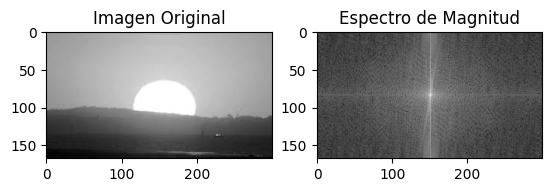

In [ ]:
# Ejemplo Funcion Lineal
import cv2
import numpy as np
import matplotlib.pyplot as plt

   # Cargar la imagen
img = cv2.imread('amanecer.jpeg', 0)

   # Aplicar la Transformada de Fourier
f_transform = np.fft.fft2(img)
f_transform_shifted = np.fft.fftshift(f_transform)

   # Calcular el espectro de magnitud
magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)

   # Visualizar
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Imagen Original')
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray'), plt.title('Espectro de Magnitud')
plt.show()

Ejercicio 2: Detección de Bordes

Objetivo: Implementar un detector de bordes utilizando el operador Sobel y visualizar los bordes encontrados en una imagen.
Pasos:

 - Carga una imagen en escala de grises.
 -Aplica el filtro Sobel en las direcciones x e y.
 - Combina los resultados para obtener la magnitud de los bordes.
 -Visualiza la imagen original y la imagen de bordes.



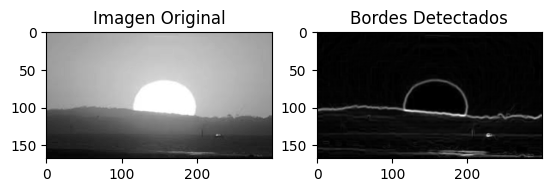

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
img = cv2.imread('amanecer.jpeg', cv2.IMREAD_GRAYSCALE)

# Aplicar el filtro Sobel
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
edges = np.sqrt(sobel_x**2 + sobel_y**2)

# Visualizar
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Imagen Original')
plt.subplot(122), plt.imshow(edges, cmap='gray'), plt.title('Bordes Detectados')
plt.show()


Ejercicio 3: Rotación de Imágenes
Objetivo: Implementar una rotación de una imagen utilizando funciones trigonométricas para calcular las nuevas coordenadas.
Pasos:
- Carga una imagen.
- Define un ángulo de rotación (en grados).
- Calcula la matriz de transformación utilizando seno y coseno.
- Aplica la rotación a la imagen.
- Visualiza la imagen original y la imagen rotada.

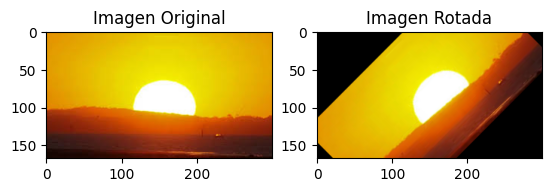

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
img = cv2.imread('amanecer.jpeg')

# Definir el ángulo de rotación
angle = 45
(h, w) = img.shape[:2]
center = (w // 2, h // 2)

# Matriz de rotación
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_img = cv2.warpAffine(img, M, (w, h))

# Visualizar
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Imagen Original')
plt.subplot(122), plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB)), plt.title('Imagen Rotada')
plt.show()

Ejercicio 4: Filtros de Frecuencia
Objetivo: Aplicar un filtro pasa-bajo a una imagen utilizando la Transformada de Fourier.
Pasos:
- Carga una imagen y aplica la Transformada de Fourier.
- Crea un filtro pasa-bajo en el dominio de la frecuencia.
- Multiplica el espectro de la imagen por el filtro.
- Aplicar la Transformada Inversa de Fourier para obtener la imagen filtrada.
- Visualiza la imagen original y la imagen filtrada.

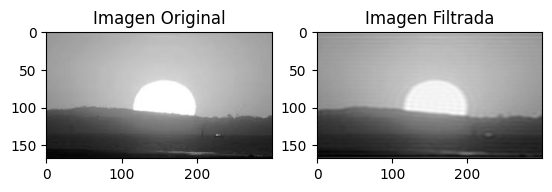

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
img = cv2.imread('amanecer.jpeg', 0)

# Aplicar la Transformada de Fourier
f_transform = np.fft.fft2(img)
f_transform_shifted = np.fft.fftshift(f_transform)

# Crear un filtro pasa-bajo
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
radius = 30
mask = np.zeros((rows, cols), np.uint8)
cv2.circle(mask, (ccol, crow), radius, 1, -1)

# Aplicar el filtro
f_transform_filtered = f_transform_shifted * mask

# Transformada Inversa
img_filtered = np.fft.ifft2(np.fft.ifftshift(f_transform_filtered))
img_filtered = np.abs(img_filtered)

# Visualizar
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Imagen Original')
plt.subplot(122), plt.imshow(img_filtered, cmap='gray'), plt.title('Imagen Filtrada')
plt.show()